<a href="https://colab.research.google.com/github/kunal-git-002/CNN/blob/master/CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential

from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D

from keras.optimizers import SGD,Adam,RMSprop

import matplotlib.pyplot as plt

import numpy as np


In [8]:
img_ch=3
img_r=32
img_c=32

In [9]:
batch_size=128
epochs=20
classes=10
verbose=1
validation_split=0.2
optim=RMSprop()

In [10]:
(x_tr,y_tr),(x_te,y_te)=cifar10.load_data()
x_tr.shape


(50000, 32, 32, 3)

In [ ]:
class_name={
0: "airplane",
1: "automobile",
2: "bird",
3: "cat",
4: "deer",
5: "dog",
6: "frog",
7: "horse",
8: "ship",
9: "truck"
}

#function 1:
#which return a name of object
def obj(index):
  obj_ind=np.argmax(index)
  obj_name=class_name[obj_ind]
  return obj_name

print(obj(y_tr[111]))
#function 2:
#plot the object with name
def plot(X,Y,i):
  object=obj(Y[i])
  fig=plt.figure(figsize=(3,3))
  fig.suptitle(object)
  plt.imshow(X[i])
  return plt.show()

plot(x_tr,y_tr,111)

In [12]:
#covert to categorical
y_tr=np_utils.to_categorical(y_tr,classes)
y_te=np_utils.to_categorical(y_te,classes)

In [13]:
#covert pixel value 0-255 to 0-1
x_tr=x_tr.astype("float32")
x_te=x_te.astype("float32")

x_tr=x_tr/255
x_te=x_te/255

In [14]:
#model building
model=Sequential()
model.add(Conv2D(32,(3,3),padding="same",input_shape=(img_r,img_c,img_ch)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(classes))

model.add(Activation("softmax"))


In [ ]:
model.summary()

***train***

In [16]:
model.compile(loss="categorical_crossentropy",optimizer=optim,metrics=["accuracy"])


In [47]:
model.fit(x_tr,y_tr,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=validation_split,
          verbose=2
          )

Epoch 1/20
313/313 - 4s - loss: 0.6484 - accuracy: 0.7767 - val_loss: 1.0930 - val_accuracy: 0.6531
Epoch 2/20
313/313 - 4s - loss: 0.6268 - accuracy: 0.7838 - val_loss: 1.1622 - val_accuracy: 0.6635
Epoch 3/20
313/313 - 4s - loss: 0.6134 - accuracy: 0.7885 - val_loss: 1.0307 - val_accuracy: 0.6795
Epoch 4/20
313/313 - 4s - loss: 0.6024 - accuracy: 0.7922 - val_loss: 1.0306 - val_accuracy: 0.6809
Epoch 5/20
313/313 - 4s - loss: 0.5908 - accuracy: 0.7959 - val_loss: 1.0565 - val_accuracy: 0.6607
Epoch 6/20
313/313 - 4s - loss: 0.5744 - accuracy: 0.8014 - val_loss: 1.1053 - val_accuracy: 0.6612
Epoch 7/20
313/313 - 4s - loss: 0.5678 - accuracy: 0.8040 - val_loss: 1.0179 - val_accuracy: 0.6755
Epoch 8/20
313/313 - 4s - loss: 0.5555 - accuracy: 0.8089 - val_loss: 1.1780 - val_accuracy: 0.6735
Epoch 9/20
313/313 - 4s - loss: 0.5489 - accuracy: 0.8140 - val_loss: 1.1255 - val_accuracy: 0.6810
Epoch 10/20
313/313 - 4s - loss: 0.5377 - accuracy: 0.8171 - val_loss: 1.1209 - val_accuracy: 0.6846

***evaluation checking the result***

In [48]:
result=model.evaluate(x_te,y_te,
                     batch_size=batch_size,
                     verbose=verbose)

score=result[0]
accuracy=result[1]

print("score: ", score)
print("accuracy: ",accuracy)

79/79 [==============================] - 0s 5ms/step - loss: 1.1479 - accuracy: 0.6644
score:  1.1478506326675415
accuracy:  0.6643999814987183


***prediction***

***extra work***

In [ ]:
import pandas as pd

df=pd.DataFrame(data=y_te)
df


***prediction***

true value:  horse
pred value:  dog


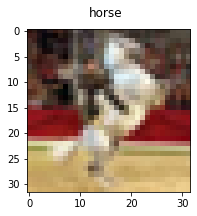

In [50]:
j=119


pred_class=model.predict_classes(x_te[j].reshape(1,32,32,3))[0]

arr=df.iloc[j].to_numpy()

true_value=np.argmax(arr)

print("true value: ",class_name[true_value])
print("pred value: ",class_name[pred_class])

plot(x_te,y_te,j)